In [6]:
from time import sleep

import pickle
import shutil
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

from matplotlib import cm # for color map
from python_speech_features import logfbank, fbank
from scipy.fftpack import dct

import speech_recognition as speech_r
import scipy.signal as signal
from pydub import AudioSegment

from silence_remover.silence_detector import SilenceDetector
from silence_remover.filter_generator import FilterGenerator
from silence_remover.media_editor import MediaEditor


Checking librosa version and speech_recognition version

In [7]:
print("librosa version : ",librosa.__version__)
print("speech_recognition version : ", speech_r.__version__)
save_path = "../test_train_data/"

librosa version :  0.7.2
speech_recognition version :  3.8.1


#### Select WAV file

In [8]:
user_list = os.listdir(save_path)
user_list.sort()
r = speech_r.Recognizer() 

print("User List :")
testInt = 0
for i, item in zip(range(len(user_list)), user_list):
    print('[{:d}] '.format(i)+item)

    file_list = os.listdir(save_path + str(user_list[i]+"/"))
    file_list.sort()

#     if os.path.exists("../feature/feature_fbank/"+str(user_list[i]+"/")) :
#         shutil.rmtree("../feature/feature_fbank/"+str(user_list[i]+"/"))
    if not os.path.exists("../feature/feature_fbank/"+str(user_list[i]+"/")) :

        for j, item2 in zip(range(len(file_list)), file_list):
            testInt = testInt+1
            final_file_name = save_path + str(user_list[i]) +"/"+ str(file_list[j])
            if not final_file_name.endswith(".wav") :
                (path, file_extension) = os.path.splitext(final_file_name)
                file_extension_final = file_extension.replace('.', '')
                      
                track = AudioSegment.from_file(final_file_name,file_extension_final)
                wav_filename = final_file_name.replace(file_extension_final, 'wav')

                wav_path = wav_filename
                print('CONVERTING: ' + str(final_file_name))
                file_handle = track.export(wav_path, format='wav')
                os.remove(final_file_name)
            else :
                wav_path = final_file_name
            
            hop_length = 512
            n_mels = 128
            n_fft = 512
            sr = 16000

            jackhammer = speech_r.AudioFile(wav_path)

            with jackhammer as source:
                r.adjust_for_ambient_noise(source)
                audio = r.record(source)
            
                temp_file = wav_path.replace(".wav", "Temp.wav")
                fw = open(temp_file, "wb")
                fw.write(audio.get_wav_data())
                fw.close()
            
                y, sr = librosa.load(temp_file, sr=16000, mono=True, duration=15)
                if len(y) > int(20.0 * sr)+sr : 
                    y = y[sr:int(20.0 * sr)+sr]
                else : 
                    print(user_list[i],item2,len(y))
                
                stft = librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hamm',
                 center=True, dtype=np.complex64, pad_mode='reflect')
                abs_STFT = np.abs(stft)
    
                mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
                mel /= np.max(mel, axis=-1)[:, None]
                mel_S = np.dot(mel, abs_STFT)
                mel_spec_test = 20 * np.log10(np.maximum(mel_S, 1e-5))

                feature_save_path = "../feature/feature_fbank/"+str(user_list[i]+"/")


                if not os.path.exists(feature_save_path):
                    os.makedirs(feature_save_path)
                    feature_result_name = str(user_list[i]) +"_"+str(0)
                else :
                    feature_files = os.listdir(feature_save_path)
                    feature_files = [file for file in feature_files if file.endswith(".npy")]
                    feature_result_name = str(user_list[i]) +"_"+str(len(feature_files))

                if os.path.exists(feature_save_path + feature_result_name+".npy"):
                    os.remove(feature_save_path + feature_result_name+".npy")

                print(feature_result_name + "' File Write Finish !")
                np.save(feature_save_path + feature_result_name, mel_spec_test) # x_save.npy
                print(" Saved File Name : "+feature_result_name)

                os.remove(temp_file)
                sleep(1)
    print(testInt)

User List :
[0] 2017019740001_kwakjuheon
0
[1] 2017019740002_kimjiho
0
[2] 2017019740003_songyejin
0
[3] 2017019740004_parksohui
0
[4] 2017019740005_moonyeonwoo
0
[5] 2017019740006_kangsubin
0
[6] 2017019740007_leekyeongeun
0
[7] 2017019740008_chochaeyeon
0
[8] 2017019740009_shindonghwan
0
[9] 2017019740010_kwakmirae
0
[10] 2017019740011_kimhyeryeong
0
[11] 2017019740012_chaeminjoon
0
[12] 2017019740013_kwakyiheon
0
[13] 2017019740014_leesumin
0
[14] 2017019740015_choihayoung
0
[15] 2017019740016_kangyeseo
0
[16] 2017019740017_kwakmihyang
0
[17] 2017019740018_eundano
0
[18] 2017019740019_limjinju
0
[19] 2017019740020_kimseongje
0
[20] 2017019740021_kwakbokyeong
0
[21] 2017019740022_ahnhyojin
0
[22] 2017019740023_heosehun
0
[23] 2017019740024_choijiwon
0
[24] 2017019740025_ahnjeongsuk
0
[25] 2017019740026_parkyeongseon
0
[26] 2017019740027_kwaksangpil
0
[27] 2017019740028_kodohyeon
0
[28] 2017019740029_limdonggeun
0
[29] 2017019740030_kanghyeyeon
0
[30] 2017019740031_jominseok
0
[31] 20

In [9]:
save_path = "../test_val_data/"
user_list = os.listdir(save_path)
user_list.sort()
r = speech_r.Recognizer() 

print("User List :")
testInt = 0
for i, item in zip(range(len(user_list)), user_list):
    print('[{:d}] '.format(i)+item)

    file_list = os.listdir(save_path + str(user_list[i]+"/"))
    file_list.sort()

#     if os.path.exists("../feature/feature_fbank_validation/"+str(user_list[i]+"/")) :
#         shutil.rmtree("../feature/feature_fbank_validation/"+str(user_list[i]+"/"))
    if not os.path.exists("../feature/feature_fbank_validation/"+str(user_list[i]+"/")) :

        for j, item2 in zip(range(len(file_list)), file_list):
            testInt = testInt+1
            final_file_name = save_path + str(user_list[i]) +"/"+ str(file_list[j])

            print(final_file_name)
            if not final_file_name.endswith(".wav") :

                (path, file_extension) = os.path.splitext(final_file_name)
                file_extension_final = file_extension.replace('.', '')

                track = AudioSegment.from_file(final_file_name,file_extension_final)
                wav_filename = final_file_name.replace(file_extension_final, 'wav')

                wav_path = wav_filename
                print('CONVERTING: ' + str(final_file_name))
                file_handle = track.export(wav_path, format='wav')
                os.remove(final_file_name)
            else :
                wav_path = final_file_name

            hop_length = 512
            n_mels = 128
            n_fft = 512
            sr = 16000

            jackhammer = speech_r.AudioFile(wav_path)

            with jackhammer as source:
                r.adjust_for_ambient_noise(source)
                audio = r.record(source)

                temp_file = wav_path.replace(".wav", "Temp.wav")
                fw = open(temp_file, "wb")
                fw.write(audio.get_wav_data())
                fw.close()

                y, sr = librosa.load(temp_file, sr=16000, mono=True, duration=15)
                y = y[sr:int(20.0 * sr)+sr]
                stft = librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hamm',
                 center=True, dtype=np.complex64, pad_mode='reflect')
                abs_STFT = np.abs(stft)

                mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
                mel /= np.max(mel, axis=-1)[:, None]
                mel_S = np.dot(mel, abs_STFT)
                mel_spec_test = 20 * np.log10(np.maximum(mel_S, 1e-5))

                feature_save_path = "../feature/feature_fbank_validation/"+str(user_list[i]+"/")


                if not os.path.exists(feature_save_path):
                    os.makedirs(feature_save_path)
                    feature_result_name = str(user_list[i]) +"_"+str(0)
                else :
                    feature_files = os.listdir(feature_save_path)
                    feature_files = [file for file in feature_files if file.endswith(".npy")]
                    feature_result_name = str(user_list[i]) +"_"+str(len(feature_files))
                
                print(feature_result_name + "' File Write Finish !")
                np.save(feature_save_path + feature_result_name, mel_spec_test) # x_save.npy
                print(" Saved File Name : "+feature_result_name)
                os.remove(temp_file)
                sleep(1)
    print(testInt)

User List :
[0] 2017019740001_kwakjuheon
0
[1] 2017019770001_kwonyuna
0
[2] 2017019880001_kimsubin
0


In [6]:


user_feature_list = os.listdir("../feature/feature_fbank/")
user_feature_list.sort()

print("User List :")
for i, item in zip(range(len(user_feature_list)), user_feature_list):
    print('[{:d}] '.format(i)+item)

selUserNum_forFeature = int(input("\n유저 번호를 선택하세요 : "))

feature_to_file_list = os.listdir("../feature/feature_fbank/" + str(user_feature_list[selUserNum_forFeature]+"/"))
feature_npy_file_list = [file for file in feature_to_file_list if file.endswith(".npy")]
feature_npy_file_list.sort()

print("\nFile List : ")
for i, item in zip(range(len(feature_npy_file_list)), feature_npy_file_list):
    print('[{:d}] '.format(i)+item)
    
selFileNum_forFeature = int(input("\n파일 번호를 선택하세요 : "))

final_feat_name = "../feature/feature_fbank/" + str(user_feature_list[selUserNum_forFeature]) +"/"+ str(feature_npy_file_list[selFileNum_forFeature])
feature_load = np.load(final_feat_name)


User List :
[0] 2017019740001_kwakjuheon
[1] 2017019740002_kimjiho
[2] 2017019740003_songyejin
[3] 2017019740004_parksohui
[4] 2017019740005_moonyeonwoo
[5] 2017019740006_kangsubin
[6] 2017019740007_leekyeongeun
[7] 2017019740008_chochaeyeon
[8] 2017019740009_shindonghwan
[9] 2017019740010_kwakmirae
[10] 2017019740011_kimhyeryeong
[11] 2017019740012_chaeminjoon
[12] 2017019740013_kwakyiheon
[13] 2017019740014_leesumin
[14] 2017019740015_choihayoung
[15] 2017019740016_kangyeseo
[16] 2017019740017_kwakmihyang
[17] 2017019740018_eundano
[18] 2017019740019_limjinju
[19] 2017019740020_kimseongje
[20] 2017019740021_kwakbokyeong
[21] 2017019740022_ahnhyojin
[22] 2017019740023_heosehun
[23] 2017019740024_choijiwon
[24] 2017019740025_ahnjeongsuk
[25] 2017019740026_parkyeongseon
[26] 2017019740027_kwaksangpil
[27] 2017019740028_kodohyeon
[28] 2017019770001_kwonyuna
[29] 2017019770002_kwoneunkyung
[30] 2017019770003_johaesu
[31] 2017019770004_leebyeongjin
[32] 2017019770005_hyeonsanghyeok
[33] 20

### Visualize Loaded Feature

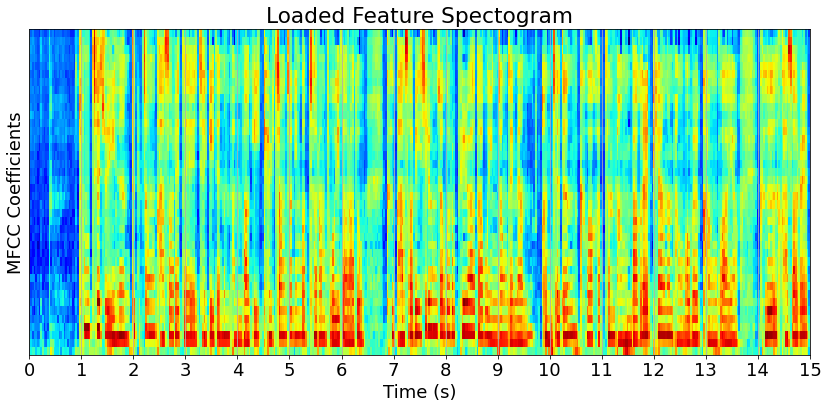

In [7]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.title("Loaded Feature Spectogram")
librosa.display.specshow(feature_load, sr=sr, hop_length=hop_length, x_axis='s', cmap=cm.jet)
# plt.colorbar()
plt.grid('on')
plt.ylabel('MFCC Coefficients')
plt.xticks(np.arange(0, 15+1, step=1), ["{:d}".format(x) for x in np.arange(0, 15+1, step=1)], 
           fontsize=18)

plt.show()